#### Load Model & Classes

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import os

#### Predict Function

In [2]:
model = tf.keras.models.load_model(
    'models/best_coffee_leaf_model.keras'
)

with open("dataset_info.pkl", "rb") as f:
    data = pickle.load(f)

class_names = data["class_names"]
IMAGE_SIZE  = data["image_size"]


#### Test Image

In [3]:
TEST_DIR = 'coffee_leaf/Test'

# اختيار كلاس عشوائي
random_class = random.choice(class_names)

class_path = os.path.join(TEST_DIR, random_class)

# اختيار صورة عشوائية من هذا الكلاس
random_image_name = random.choice(os.listdir(class_path))
random_image_path = os.path.join(class_path, random_image_name)

print("Random Image Path:", random_image_path)


Random Image Path: coffee_leaf/Test\Rust\1504.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


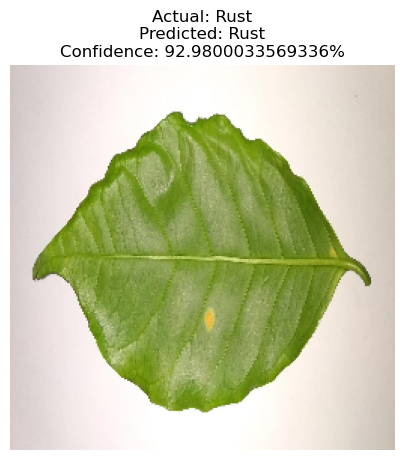

In [4]:
# تحميل الصورة
img = tf.keras.preprocessing.image.load_img(
    random_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array_norm = img_array / 255.0
img_array_norm = np.expand_dims(img_array_norm, axis=0)

# التنبؤ
preds = model.predict(img_array_norm)
predicted_class = class_names[np.argmax(preds)]
confidence = round(100 * np.max(preds), 2)

# عرض النتيجة
plt.figure(figsize=(5,5))
plt.imshow(img_array.astype("uint8"))
plt.axis("off")
plt.title(
    f"Actual: {random_class}\n"
    f"Predicted: {predicted_class}\n"
    f"Confidence: {confidence}%"
)
plt.show()
